# Telemetria HAM VS VER nel giro del sorpasso

In [1]:
import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting
from matplotlib.patches import Rectangle
import numpy as np

ff1.Cache.enable_cache('2023Australia')    
race = ff1.get_session(2023, 'Astralia', 'R')
race_laps = race.load_laps(with_telemetry=True)
race.load()

c:\Users\ricca\OneDrive\Desktop\F1dataAnalysis\env\Lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Australian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
c:\Users\ricca\OneDrive\Desktop\F1dataAnalysis\env\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
c:\User

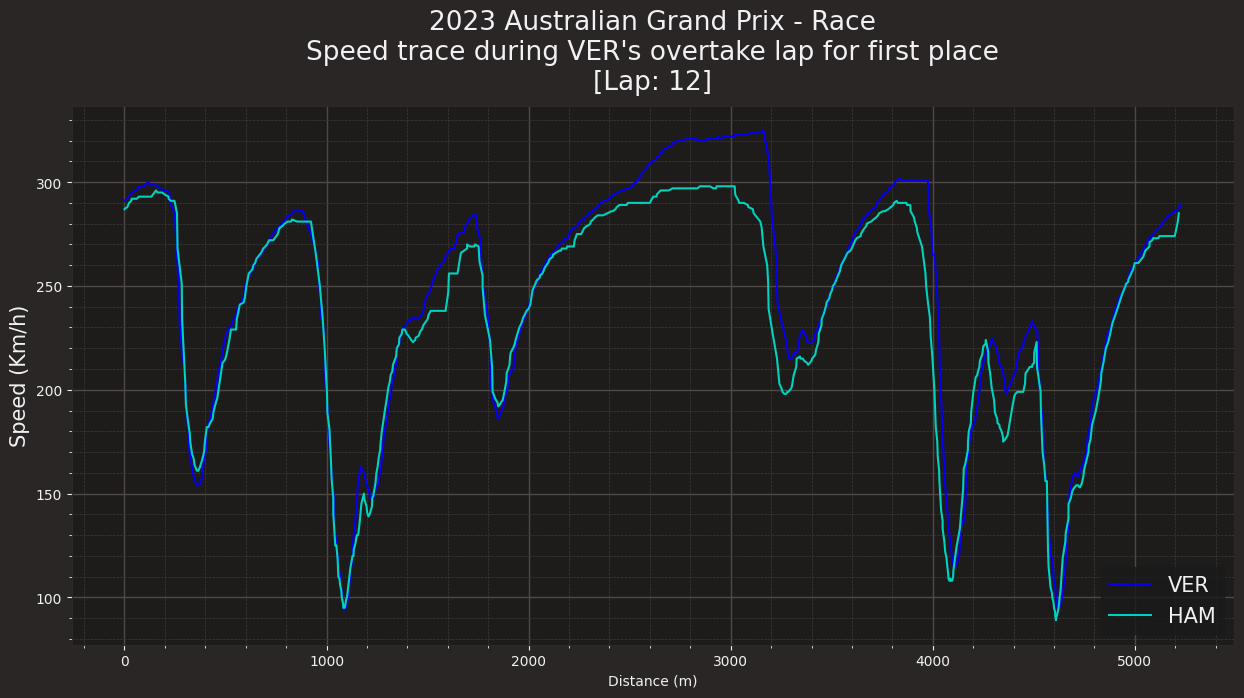

In [3]:
driver_1, driver_2 = 'VER', 'HAM'
laps_driver_1 = race.laps.pick_driver(driver_1)
laps_driver_2 = race.laps.pick_driver(driver_2)

fastest_driver_1 = laps_driver_1.loc[laps_driver_1['LapNumber']==12]
fastest_driver_2 = laps_driver_2.loc[laps_driver_2['LapNumber']==12]

telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

delta_time12, ref_tel12, compare_tel12 = utils.delta_time(fastest_driver_1, fastest_driver_2)

plot_size = [15, 7]
plot_title = f"{race.event.year} {race.event.EventName} - {race.name}\nSpeed trace during {driver_1}'s overtake lap for first place\n[Lap: {int(fastest_driver_1.iloc[0]['LapNumber'])}]"
plot_ratios = [1]

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size
ff1.plotting.setup_mpl()
# Create subplots with different sizes
fig, ax = plt.subplots(1, gridspec_kw={'height_ratios': plot_ratios})

# Set the plot title
ax.title.set_text(plot_title)

# Speed trace
ax.plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color("Red Bull"))
ax.plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color("Mercedes"))
ax.set_ylabel("Speed (Km/h)")
ax.legend(loc="lower right", prop={'size': 15})
ax.set_xlabel("Distance (m)")
ax.yaxis.label.set_size(15)
